In [100]:
from collections import defaultdict
from datetime import datetime
import math
from operator import itemgetter
import os
import random
import re
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
import numpy as np
import pandas as pd
from pathlib import Path

%matplotlib inline

import little_mallet_wrapper as lmw
import warnings
warnings.filterwarnings('ignore')

In [101]:
os.environ['MALLET_HOME'] = 'C:/tmp/mallet-2.0.8/'

In [102]:
path_to_mallet = 'C:\\tmp\\mallet-2.0.8\\bin\\mallet'

In [103]:
covid_path = 'E:\dataset\dfyutup-cleanedfixversion3.csv'

In [104]:
covid_df = pd.read_csv(covid_path)
covid_df.sample(5)

,Datetime,likeCount,Comments,Author
2808,2/20/2015 13:45,0,wkwkw ngakak anjir \r\nsemangat bang \r\nbuat ...,Mohammad Fauzi
1883,2/22/2015 8:33,0,kapan makan jembut lagi cukk,Babang Gen
9674,2/22/2015 21:12,1,jesswithlimit pedo,Melona de
7037,2/23/2015 11:55,0,pagi dimulai yg sehat sehat,FAKA FAD
2598,2/20/2015 21:42,0,anan masyarakat sangat menghiburrr wkwkkw,ahmad reza mahfudz


In [105]:
print(len(covid_df.index))

11072


In [106]:
training_data = [lmw.process_string(t) for t in covid_df['Comments'].tolist()]
training_data = [d for d in training_data if d.strip()]

len(training_data)

10987

In [107]:
training_data[10]

'bang collab bang leokoce'

In [108]:
authors = covid_df['Author'].tolist()

len(authors)

11072

In [109]:
lmw.print_dataset_stats(training_data)

Number of Documents: 10987
Mean Number of Words per Document: 10.7
Vocabulary Size: 11844


In [110]:
def process_string(text, 
                   lowercase=True, 
                   remove_short_words=True, 
                   remove_stop_words=True, 
                   remove_punctuation=True, 
                   numbers='replace', 
                   stop_words=StopWordRemover,
                   stop_words_extra=[]):
    if lowercase:
        text = text.lower()
    if numbers == 'replace':
        text = re.sub('[0-9]+', 'NUM', text)
    elif numbers == 'remove':
        text = re.sub('[0-9]+', ' ', text)
    if remove_punctuation:
        text = re.sub(r'[^\sA-Za-z0-9À-ÖØ-öø-ÿЀ-ӿ/]', ' ', text)
    if remove_stop_words:
        text = ' '.join([word for word in text.split() if word not in stop_words + stop_words_extra])
    if remove_short_words:
        text = ' '.join([word for word in text.split() if not len(word) <= 2])
    text = ' '.join(text.split())
    return text

In [111]:
num_topics = 20  # CHANGE THIS TO YOUR PREFERRED NUMBER OF TOPICS

output_directory_path = 'E:/dataset/mallet' # CHANGE THIS TO YOUR OUTPUT DIRECTORY

In [112]:
topic_keys, topic_distributions = lmw.quick_train_topic_model(path_to_mallet, 
                                                              output_directory_path, 
                                                              num_topics, 
                                                              training_data)

Importing data...
Complete
Training topic model...
Complete


In [113]:
assert(len(topic_distributions) == len(training_data))

In [114]:
for i, t in enumerate(topic_keys):
    print(i, '\t', ' '.join(t[:10]))

0 	 bang gua ngakak bikin nya video rik konten lagi dong
1 	 haters orang aja itu dia yang nya gak bisa kalo
2 	 itu dan dia gua kata tapi lim ericko ngomong yang
3 	 anak yang kalo bisa orang mana nonton mereka itu video
4 	 yang dan tidak kalian itu orang untuk dia punya atau
5 	 ericko king real lim limericko bwa soap loe terharu limerickoericko
6 	 haters banyak fans duit makin itu kaya uang hater adsense
7 	 arap subs botak nya mana rick rewind mau reza janji
8 	 botak hiya boong tapi gua bully juga nih ong koplak
9 	 iklan skip memek bau gua ngilu menit bisa iklannya anti
10 	 channel ini chanel saya subscribe luh aku subs friendly paling
11 	 sama bang ada gua ama qorygore lagi dong gue suka
12 	 kontol anjing bangsat memek makan muka jembut manis ngentot tai
13 	 bang semangat gua terus haters soapers suka aja lim ericko
14 	 wik hate komen comment coment baca masuk bacain biar first
15 	 intro legend ericko back limit akhirnya lim opening jess lama
16 	 tung ada anda punya dan

In [115]:
for p, d in lmw.get_top_docs(training_data, topic_distributions, topic_index=0, n=3):
    print(round(p, 4), d)
    print()

0.8743 bang bikin lagu nya kapan lagi bang seru bang keren lebih bagus dari young lex bikin bang plis

0.8739 gua saranin sekali kali bikin tutorial coli yang betul bang

0.8622 mantapp ngakak liatnyal satu video biar bikin ketawa wkwkwkwk



In [116]:
num_topics = 20  # CHANGE THIS TO YOUR PREFERRED NUMBER OF TOPICS

output_directory_path = 'E:/dataset/mallet' # CHANGE THIS TO YOUR OUTPUT DIRECTORY

path_to_training_data           = output_directory_path + '/training.txt'
path_to_formatted_training_data = output_directory_path + '/mallet.training'
path_to_model                   = output_directory_path + '/mallet.model.' + str(num_topics)
path_to_topic_keys              = output_directory_path + '/mallet.topic_keys.' + str(num_topics)
path_to_topic_distributions     = output_directory_path + '/mallet.topic_distributions.' + str(num_topics)
path_to_word_weights            = output_directory_path + '/mallet.word_weights.' + str(num_topics)
path_to_diagnostics             = output_directory_path + '/mallet.diagnostics.' + str(num_topics) + '.xml'

In [117]:
lmw.import_data(path_to_mallet,
                path_to_training_data,
                path_to_formatted_training_data,
                training_data)

Importing data...
Complete


In [118]:
lmw.train_topic_model(path_to_mallet,
                      path_to_formatted_training_data,
                      path_to_model,
                      path_to_topic_keys,
                      path_to_topic_distributions,
                      path_to_word_weights,
                      path_to_diagnostics,
                      num_topics)

Training topic model...
Complete


In [119]:
topic_keys = lmw.load_topic_keys(output_directory_path + '/mallet.topic_keys.' + str(num_topics))

for i, t in enumerate(topic_keys):
    print(i, '\t', ' '.join(t[:10]))

0 	 ngakak gua iklan skip anjing nya video ada gak liat
1 	 komen hate baca comment coment haters biar masuk ada bacain
2 	 bang bikin lagi dong konten buat wkwk toxic nya video
3 	 itu orang yang dan dari dia ini baik nya bisa
4 	 anak yang toxic ngomong nonton kalo kasar nya kecil jangan
5 	 haters kontol banyak kaya duit makin manis biar uang adsense
6 	 dia haters ericko itu lim gak bisa nya orang yang
7 	 arap sama fans ada haters qorygore nya bro reza tertunda
8 	 kontol anjing memek bau bangsat makan muka jembut sama ngentot
9 	 yang kalian dan tidak itu konten punya untuk atau orang
10 	 ericko king real lim limericko life dance kemaluan eri terharu
11 	 gak suka aja kalo nonton haters channel buat yang mau
12 	 botak hiya tapi boong tung wik gua bully mli aah
13 	 mana baik yang bisa tau kalo kan buat mau punya
14 	 haters ganteng kok bang itu tolol erick goblok sok jahat
15 	 like subs ini saya bang luh subscribe botak channel mana
16 	 gua suka tapi bang gue toxic sama konte

In [120]:
topic_keys = lmw.load_topic_keys(output_directory_path + '/mallet.topic_keys.' + str(num_topics))

for i, t in enumerate(topic_keys):
    print(i, '\t', ' '.join(t[:10]))

0 	 ngakak gua iklan skip anjing nya video ada gak liat
1 	 komen hate baca comment coment haters biar masuk ada bacain
2 	 bang bikin lagi dong konten buat wkwk toxic nya video
3 	 itu orang yang dan dari dia ini baik nya bisa
4 	 anak yang toxic ngomong nonton kalo kasar nya kecil jangan
5 	 haters kontol banyak kaya duit makin manis biar uang adsense
6 	 dia haters ericko itu lim gak bisa nya orang yang
7 	 arap sama fans ada haters qorygore nya bro reza tertunda
8 	 kontol anjing memek bau bangsat makan muka jembut sama ngentot
9 	 yang kalian dan tidak itu konten punya untuk atau orang
10 	 ericko king real lim limericko life dance kemaluan eri terharu
11 	 gak suka aja kalo nonton haters channel buat yang mau
12 	 botak hiya tapi boong tung wik gua bully mli aah
13 	 mana baik yang bisa tau kalo kan buat mau punya
14 	 haters ganteng kok bang itu tolol erick goblok sok jahat
15 	 like subs ini saya bang luh subscribe botak channel mana
16 	 gua suka tapi bang gue toxic sama konte

In [121]:
topic_distributions = lmw.load_topic_distributions(output_directory_path + '/mallet.topic_distributions.' + str(num_topics))

len(topic_distributions), len(topic_distributions[0])

(10987, 20)

In [122]:
assert(len(topic_distributions) == len(training_data))

In [123]:
for p, d in lmw.get_top_docs(training_data, topic_distributions, topic_index=0, n=3):
    print(round(p, 4), d)
    print()

0.8777 ada iklan ngak gue skip iklan menit detik ngak gue skip skip

0.8682 seberapa greget gue gue nonton video ini volume full tanpa headset

0.8438 gua males skip iklan anjing anti skip skip club



In [124]:
topic_word_probability_dict = lmw.load_topic_word_distributions(output_directory_path + '/mallet.word_weights.' + str(num_topics))

len(topic_word_probability_dict)

20

In [125]:
for _topic, _word_probability_dict in topic_word_probability_dict.items():
    print('Topic', _topic)
    for _word, _probability in sorted(_word_probability_dict.items(), key=lambda x: x[1], reverse=True)[:5]:
        print(round(_probability, 4), '\t', _word)
    print()

Topic 0
0.0637 	 ngakak
0.0621 	 gua
0.0372 	 iklan
0.0365 	 skip
0.0243 	 anjing

Topic 1
0.0567 	 komen
0.0473 	 hate
0.0356 	 baca
0.026 	 comment
0.021 	 coment

Topic 2
0.0712 	 bang
0.037 	 bikin
0.0323 	 lagi
0.0249 	 dong
0.0232 	 konten

Topic 3
0.0362 	 itu
0.0324 	 orang
0.0316 	 yang
0.0285 	 dan
0.019 	 dari

Topic 4
0.0397 	 anak
0.0159 	 yang
0.0151 	 toxic
0.0136 	 nonton
0.0136 	 ngomong

Topic 5
0.0972 	 haters
0.0654 	 kontol
0.0537 	 banyak
0.0343 	 kaya
0.0321 	 duit

Topic 6
0.0231 	 dia
0.0191 	 haters
0.019 	 ericko
0.0182 	 itu
0.0179 	 lim

Topic 7
0.0348 	 arap
0.0334 	 sama
0.0279 	 fans
0.0206 	 ada
0.0177 	 haters

Topic 8
0.0916 	 kontol
0.059 	 anjing
0.0466 	 memek
0.022 	 bau
0.0209 	 bangsat

Topic 9
0.0386 	 yang
0.0329 	 kalian
0.0317 	 dan
0.0206 	 tidak
0.0149 	 itu

Topic 10
0.3306 	 ericko
0.2086 	 king
0.2042 	 real
0.119 	 lim
0.0047 	 limericko

Topic 11
0.031 	 gak
0.0268 	 suka
0.0262 	 aja
0.0242 	 kalo
0.0211 	 nonton

Topic 12
0.5509 	 b

In [126]:
lmw.get_js_divergence_topics(0, 7, topic_word_probability_dict)

0.7536190849298322

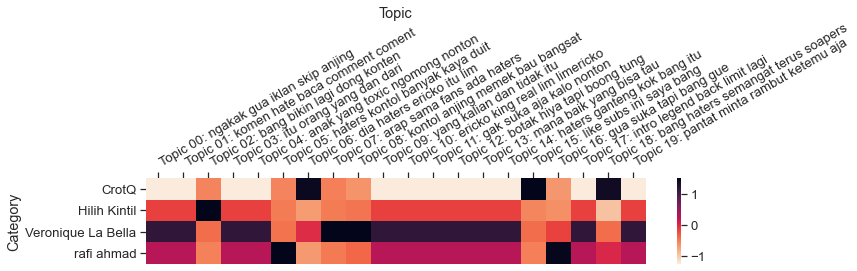

In [132]:
target_labels = ['rafi ahmad', 'Hilih Kintil', 'Veronique La Bella', 'CrotQ']

lmw.plot_categories_by_topics_heatmap(authors,
                                      topic_distributions,
                                      topic_keys,
                                      output_path=output_directory_path + '/categories_by_topics.pdf',
                                      target_labels=target_labels,
                                      dim=(12,4))

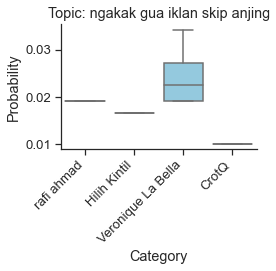

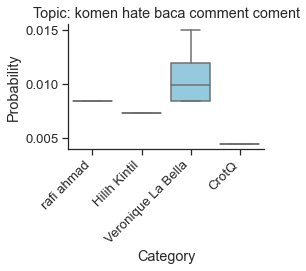

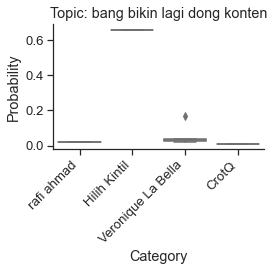

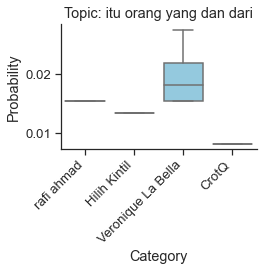

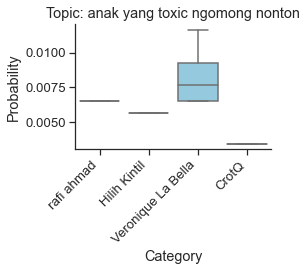

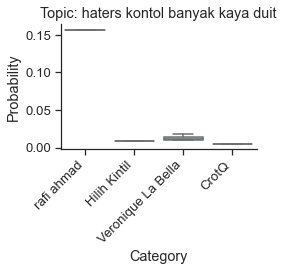

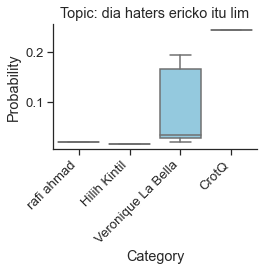

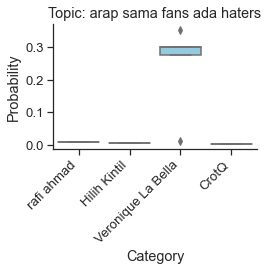

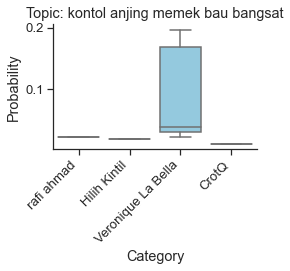

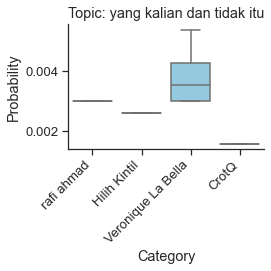

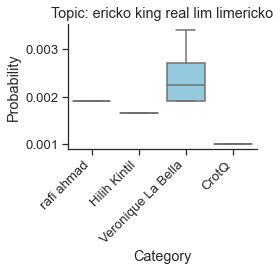

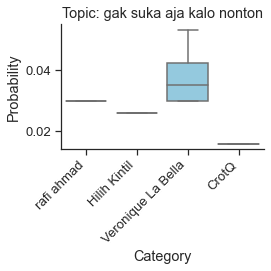

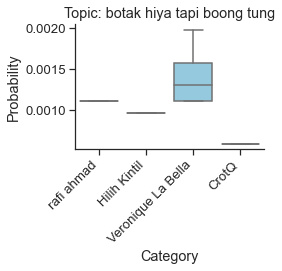

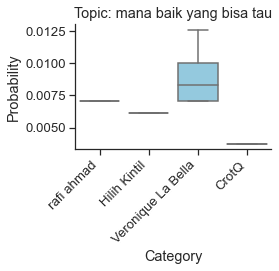

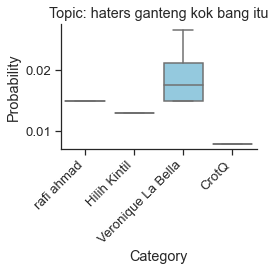

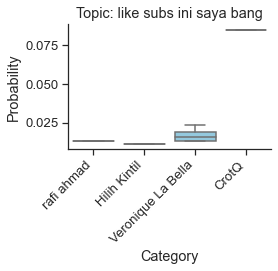

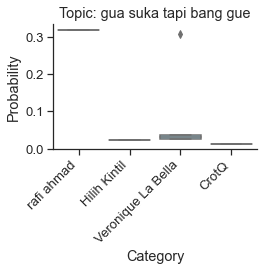

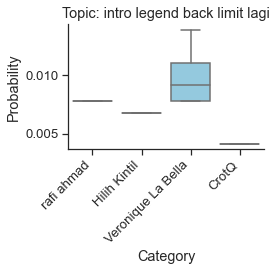

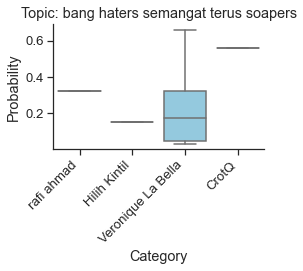

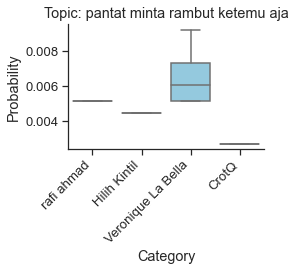

In [131]:
for _topic_index in range(0, len(topic_keys)):
    
    lmw.plot_categories_by_topic_boxplots(authors,
                                          topic_distributions,
                                          topic_keys, 
                                          _topic_index,
                                          output_path=output_directory_path + '/boxplot.' + str(_topic_index) + '.pdf',
                                          target_labels=target_labels,
                                          dim=(4,4))

In [133]:
divided_documents, document_ids, times = lmw.divide_training_data(training_data,
                                                                  num_chunks=10)

len(divided_documents), len(document_ids), len(times)

(109870, 109870, 109870)

In [134]:
path_to_divided_training_data           = output_directory_path + '/training.split.txt'
path_to_divided_formatted_training_data = output_directory_path + '/mallet.split.training'
path_to_divided_topic_distributions     = output_directory_path + '/mallet.split.topic_distributions.' + str(num_topics)

In [135]:
lmw.import_data(path_to_mallet,
                path_to_divided_training_data,
                path_to_divided_formatted_training_data,
                divided_documents,
                use_pipe_from=path_to_formatted_training_data)

Importing data using pipe...
Complete


In [136]:
lmw.infer_topics(path_to_mallet,
                 path_to_model,
                 path_to_divided_formatted_training_data,
                 path_to_divided_topic_distributions)

Inferring topics using pre-trained model...
Complete


In [137]:
topic_distributions = lmw.load_topic_distributions(path_to_divided_topic_distributions)

len(topic_distributions), len(topic_distributions[2])

(109870, 20)

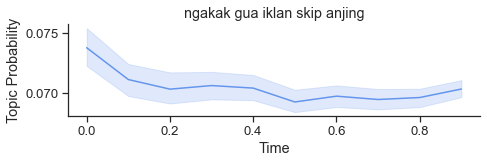

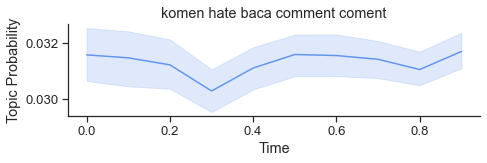

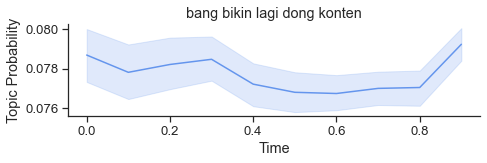

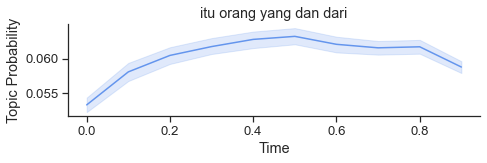

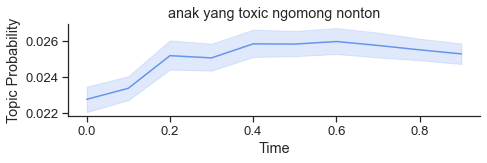

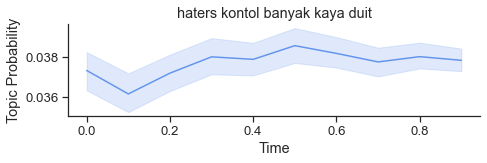

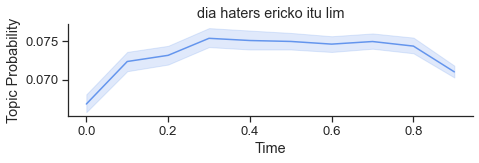

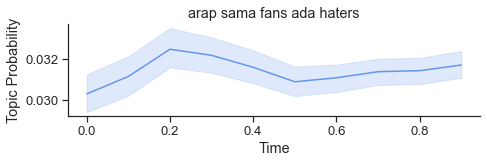

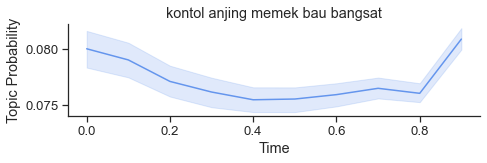

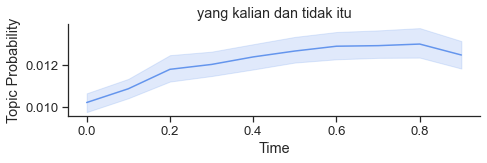

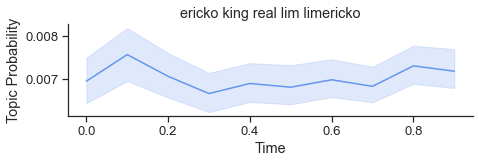

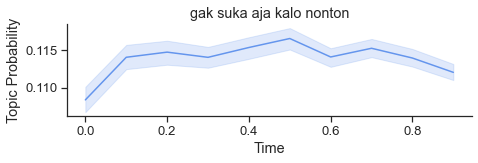

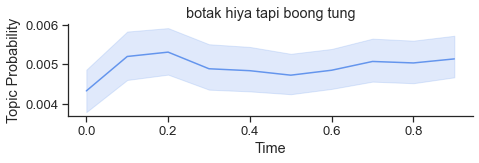

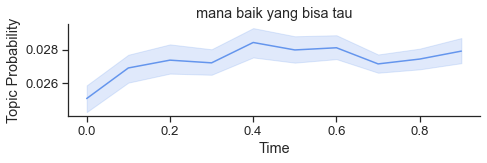

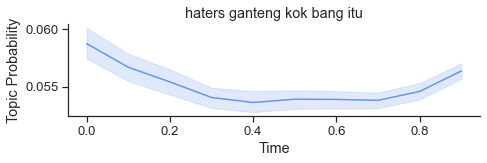

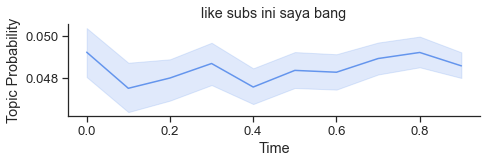

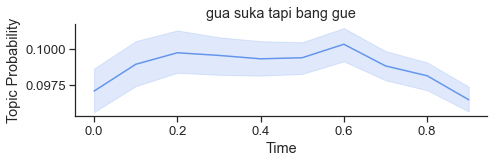

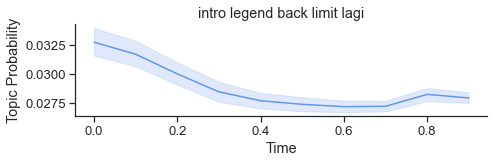

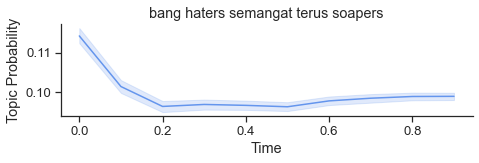

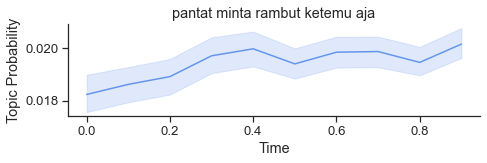

In [138]:
for _topic_index in range(0, len(topic_keys)):
    lmw.plot_topics_over_time(topic_distributions, topic_keys, times, _topic_index)